In [1]:
import os
from dotenv import load_dotenv
from datetime import datetime

from pathlib import Path
import sys
sys.path.append('..')  # Add parent directory to path

from IPython.display import Image, display, Markdown

from config import Settings, load_project_config, initialize_llm, get_settings
from workflow import create_workflow
from nodes.context_generator_node import context_generator_node


In [2]:
# Load environment variables from .env file
print(load_dotenv())

# Verify environment variables are loaded
print("Environment variables loaded:")
print(f"OPENAI_API_KEY: {'***' + os.getenv('OPENAI_API_KEY', '')[-4:] if os.getenv('OPENAI_API_KEY') else 'NOT SET'}")
print(f"OPENAI_MODEL: {os.getenv('OPENAI_MODEL', 'gpt-4.1-mini (default)')}")

True
Environment variables loaded:
OPENAI_API_KEY: ***GH0A
OPENAI_MODEL: gpt-4.1-mini (default)


In [3]:
# Load environment-based settings (from .env)
settings = Settings()
print("Settings loaded from .env:")
print(f"  Model: {settings.openai_model}")
print(f"  Temperature: {settings.temperature}")
print(f"  Max Tokens: {settings.max_tokens}")

Settings loaded from .env:
  Model: gpt-4.1-mini
  Temperature: 0.1
  Max Tokens: 2000


---

In [4]:
# Load project configuration from YAML
# project_dir = "../project-inputs/abelaa"
# project_dir = "../project-inputs/chef"
project_dir = "../project-inputs/serverlessmike"

project_config = load_project_config(project_dir)

print("\nProject configuration loaded:")
print(f"  Project Name: {project_config['project_name']}")
print(f"  Terraform Minor: {project_config['terraform_minor']}")
print(f"  Terraform Major: {project_config['terraform_major']}")
print(f"  Source Code ZIP: {project_config['source_code_zip']}")
print(f"  Knowledge Base: {project_config['knowledge_base']}")
print(f"  LLM Model: {project_config['llm']['model']}")


Project configuration loaded:
  Project Name: serverlessmike
  Terraform Minor: serverlessmike_cloud_evolucion_menor.tf
  Terraform Major: serverlessmike_cloud_evolucion_mayor.tf
  Source Code ZIP: serverlessmike_app.zip
  Knowledge Base: knowledge/IAC.txt
  LLM Model: gpt-4.1-mini


In [5]:
# Initialize the global LLM instance
llm = initialize_llm(settings)
print("\nLLM initialized:")
print(f"  Model: {llm.model_name}")
print(f"  Temperature: {llm.temperature}")


LLM initialized:
  Model: gpt-4.1-mini
  Temperature: 0.1



Workflow created successfully!


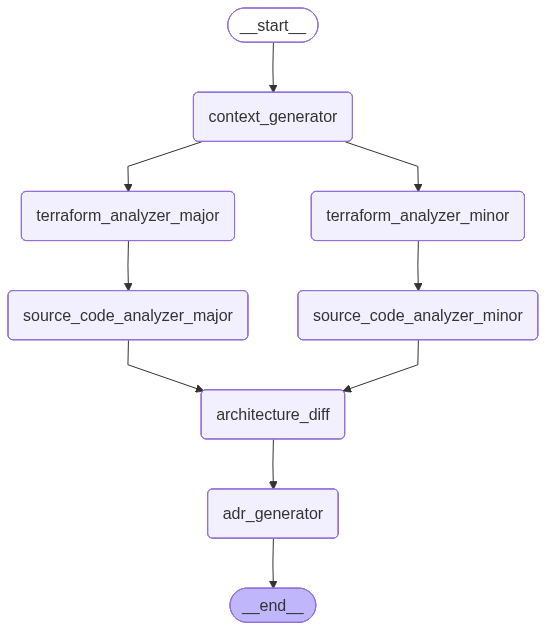

In [6]:
# Create the workflow graph
app = create_workflow(project_dir)

print("\nWorkflow created successfully!")
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
# Build initial state from project config
initial_state = {
    "project_name": project_config["project_name"],
    "terraform_minor": str(Path(project_dir) / project_config["terraform_minor"]),
    "terraform_major": str(Path(project_dir) / project_config["terraform_major"]),
    "source_code_zip": str(Path(project_dir) / project_config["source_code_zip"]),
    "knowledge_base": project_config["knowledge_base"],
    "timestamp": datetime.now().isoformat()
}

print("\nInitial state prepared:")
for key, value in initial_state.items():
    if key not in ["terraform_minor", "terraform_major", "source_code_zip"]:
        print(f"  {key}: {value}")
    else:
        print(f"  {key}: {Path(value).name}")


Initial state prepared:
  project_name: serverlessmike
  terraform_minor: serverlessmike_cloud_evolucion_menor.tf
  terraform_major: serverlessmike_cloud_evolucion_mayor.tf
  source_code_zip: serverlessmike_app.zip
  knowledge_base: knowledge/IAC.txt
  timestamp: 2026-02-14T17:23:33.087249


---

In [12]:
# Test context generator node
print("\n--- Testing Context Generator Node ---")

context_result = await context_generator_node(initial_state, llm=llm)

print(f"Architectural context generated: {len(context_result['architectural_context'])} characters")
print(f"Project structure extracted: {len(context_result['project_structure'])} characters")
print()

# display(Markdown(context_result['architectural_context']))
# display(Markdown(context_result['project_structure']))
print(context_result['project_structure'])

context_result


--- Testing Context Generator Node ---
Architectural context generated: 7145 characters
Project structure extracted: 361 characters

PROJECT STRUCTURE ANALYSIS

Total Directories: 0
Python Files: 0
TypeScript Files: 0
TSX Files: 0
JavaScript Files: 1
PHP Files: 0
Java Files: 0
XML Files: 0
Terraform Files: 0
Configuration Files: 0
Other Files: 0


PROJECT FILE TREE:
index.js


FILE TYPE BREAKDOWN:

  JavaScript Source Files:
    - index.js


{'project_name': 'serverlessmike',
 'terraform_minor': '../project-inputs/serverlessmike/serverlessmike_cloud_evolucion_menor.tf',
 'terraform_major': '../project-inputs/serverlessmike/serverlessmike_cloud_evolucion_mayor.tf',
 'source_code_zip': '../project-inputs/serverlessmike/serverlessmike_app.zip',
 'knowledge_base': 'knowledge/IAC.txt',
 'timestamp': '2026-02-14T17:23:33.087249',
 'architectural_context': '\n# Theoretical Introduction to Software Architecture, Monolithic Architecture, and Microservices Architecture\n\n## 1. Software Architecture\n\n### Definition\nSoftware architecture refers to the fundamental structures of a software system and the discipline of creating such structures and systems. It involves the high-level structuring of software components, their relationships, and the principles and guidelines governing their design and evolution over time.\n\n### Purpose and Importance\n- **Blueprint for Development:** Acts as a blueprint guiding the design and implement

In [ ]:
# for k, v in context_result['source_code_dict'].items():
#     print("="*10+" "+k)
#     print(v)
#     print("="*20)

========== index.js
'use strict';

/**
 * Lambda handler para API Gateway (REST o HTTP API) con proxy integration.
 * Retorna HTML directamente.
 */
exports.handler = async (event) => {
  const path = event?.rawPath || event?.path || "/";
  const method = event?.requestContext?.http?.method || event?.httpMethod || "GET";

  // Mini endpoint de salud opcional
  if (path === "/health") {
    return {
      statusCode: 200,
      headers: {
        "Content-Type": "application/json; charset=utf-8",
        "Cache-Control": "no-store",
      },
      body: JSON.stringify({ ok: true }),
    };
  }

  // Solo respondemos HTML para GET a "/"
  if (method !== "GET") {
    return {
      statusCode: 405,
      headers: {
        "Content-Type": "text/plain; charset=utf-8",
        "Allow": "GET",
      },
      body: "Method Not Allowed",
    };
  }

  const html = `<!doctype html>
<html lang="es">
<head>
  <meta charset="utf-8" />
  <meta name="viewport" content="width=device-width, initial-sc

---